<a href="https://colab.research.google.com/github/nangchung/truyvandaphuong/blob/main/b%C3%A0i_2_Seam_Carving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy.ndimage.filters import convolve


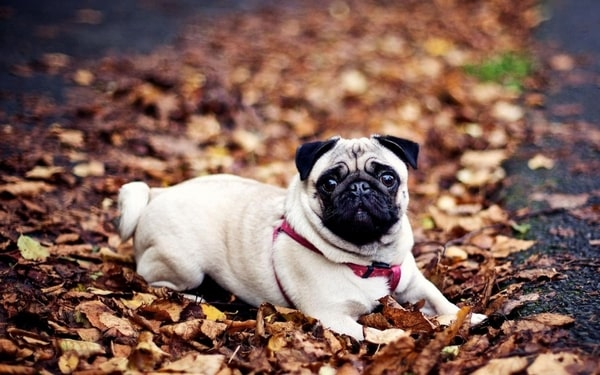

In [2]:
# Đọc ảnh
img = cv2.imread('/content/cho.jpg')
cv2_imshow(img)

In [5]:
# Hàm tính năng lượng điểm ảnh
def calc_energy(img):
    filter_T =0.02* np.array([
        [1.0, 2.0, 1.0],
        [0.0, 0.0, 0.0],
        [-1.0, -2.0, -1.0], ])
    
    filter_T = np.stack([filter_T] * 3, axis=2)

    filter_N = 0.02*np.array([
        [1.0, 0.0, -1.0],
        [2.0, 0.0, -2.0],
        [1.0, 0.0, -1.0],])
    
    filter_N = np.stack([filter_N] * 3, axis=2)

    img = img.astype('float32')
    convolved = np.absolute(convolve(img, filter_T)) + np.absolute(convolve(img, filter_N))

    # We sum the energies in the red, green, and blue channels
    energy_map = convolved.sum(axis=2)

    return energy_map

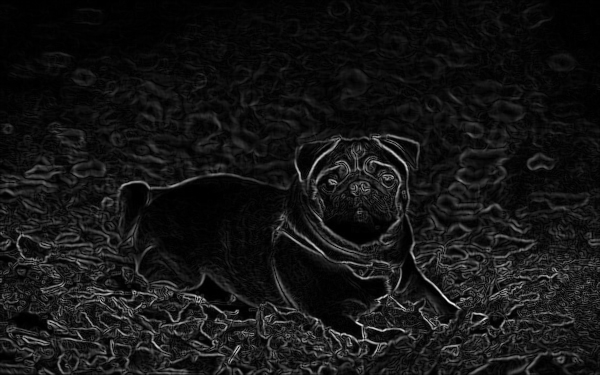

In [6]:
image = calc_energy(img)
cv2_imshow(image)

In [7]:
# Hàm tìm đường seam có tổng năng lượng nhỏ nhất
def minimum_seam(img):
    r, c, _ = img.shape       # r là chiều rộng, c là chiều cao của bức ảnh
    energy_map = calc_energy(img)   # tính mức năng lượng điểm ảnh dựa trên hàm được tạo
  
    M = energy_map.copy()  #  coppy 1 mức năng lượng lưu vào biến M
    backtrack = np.zeros_like(M, dtype=np.int)

    for i in range(1, r):
        for j in range(0, c):
            # xử lý cột bên trái, tránh giá trị j= -1
            if j == 0:
                idx = np.argmin(M[i - 1, j:j + 2])
                backtrack[i, j] = idx + j
                min_energy = M[i - 1, idx + j]
            else:
                idx = np.argmin(M[i - 1, j - 1:j + 2])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i - 1, idx + j - 1]
            M[i, j] += min_energy
    return M, backtrack

In [8]:
# Hàm xóa đường seam
def carve_column(img):
    r, c, _ = img.shape
    M, backtrack = minimum_seam(img)
    mask = np.ones((r, c), dtype=np.bool)
    j = np.argmin(M[-1])

    for i in reversed(range(r)):
        mask[i, j] = False
        j = backtrack[i, j]
    mask = np.stack([mask] * 3, axis=2)
    img = img[mask].reshape((r, c - 1, 3))

    return img

ảnh ban đầu:


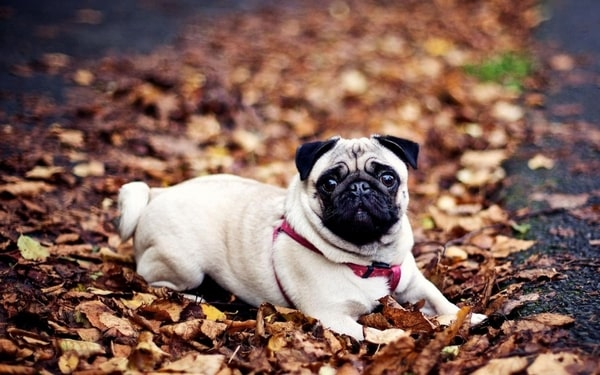


ảnh sau khi đã seam carving: 


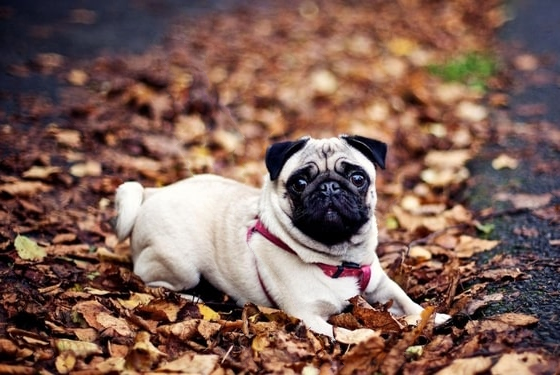

In [11]:
print('ảnh ban đầu:')
cv2_imshow(img)
image = img
for x in range(40):
    image = carve_column(image)

print('\nảnh sau khi đã seam carving: ')
cv2_imshow(image)